## Reading the Scrapped Data

In [ ]:
import pandas as pd

In [ ]:
import os
import json
data_path = "/content/drive/MyDrive/GroupProject/Data/"
image_list = []
comments_list = [
]
captions_list = []
# for all the collected data in path
for file in os.listdir(data_path):
     filename = os.fsdecode(file)
     if filename.endswith(".json") : 
          full_path = os.path.join(data_path, filename)
          with open(full_path,"r") as f:
            json_d = f.read()
          data = json.loads(json_d)
          #print(data)
          for d in data:
            if d['Image'] in image_list:
              continue
            else:
              image_list.append(d["Image"])
              comments_list.append(d["Comments"])
              captions_list.append(d["caption"])
     else:
         continue
print(image_list)

FileNotFoundError: ignored

In [ ]:
print(len(image_list))

1646


## For Downloading Images

In [ ]:
import urllib.request


# loop through the image URLs and download each one
for i,url in enumerate(image_list):
    try:
        # open the URL image
        with urllib.request.urlopen(url) as url_image:
            # read the image data
            image_data = url_image.read()
        
        # get the file name from the URL
        file_name = url.split('/')[-1]
        
        # write the image data to a file
        with open("/content/drive/MyDrive/GroupProject/Images/"+file_name, 'wb') as f:
            f.write(image_data)
            print('Downloaded', file_name)
        file_name = file_name.split(".")[0]
        with open("/content/drive/MyDrive/GroupProject/Comment/"+file_name+".txt", 'w') as f:
            f.write(captions_list[i]+"\n")
            f.writelines(comments_list[i])
            print("Written ", file_name)
    except Exception as e:
        print('download', e)
        image_list.pop(i)
        comments_list.pop(i)
        captions_list.pop(i)
        print(i)


Downloaded q5hxiq9tljoa1.jpg
Written  q5hxiq9tljoa1
Downloaded 6g0wuj582vka1.jpg
Written  6g0wuj582vka1
Downloaded i3uzxp5qe7ia1.png
Written  i3uzxp5qe7ia1
Downloaded n8knay8tweoa1.jpg
Written  n8knay8tweoa1
Downloaded 6ehwjtoho3la1.jpg
Written  6ehwjtoho3la1
Downloaded 3rExkHp.jpg
Written  3rExkHp
Downloaded vn9qd2v.jpg
Written  vn9qd2v
Downloaded xoostvr1ieoa1.jpg
Written  xoostvr1ieoa1
Downloaded hwcaydokvvaa1.jpg
Written  hwcaydokvvaa1
Downloaded 07ab0z57x4ca1.jpg
Written  07ab0z57x4ca1
Downloaded uxmexz121afa1.jpg
Written  uxmexz121afa1
Downloaded 7qsulpwnhmga1.jpg
Written  7qsulpwnhmga1
Downloaded jkwrrylj9s7a1.jpg
Written  jkwrrylj9s7a1
Downloaded kzgxatgzazfa1.jpg
Written  kzgxatgzazfa1
Downloaded 1deaj7oddaia1.jpg
Written  1deaj7oddaia1
Downloaded 1japi49hlila1.jpg
Written  1japi49hlila1
Downloaded 7t36s3hof7ka1.jpg
Written  7t36s3hof7ka1
Downloaded fck8pcu7upna1.jpg
Written  fck8pcu7upna1


KeyboardInterrupt: ignored

##For Analyzing the Captions and Comments

In [ ]:
!pip install pysentimiento
from pysentimiento import create_analyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 74.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317

In [ ]:

bert= create_analyzer(task="sentiment", lang="es")
data_analyzed = []

for i,url in enumerate(image_list):
  file_name = url.split('/')[-1]
  file_name = file_name.split(".")[0]

  for ii in comments_list[i]:
    x = bert.predict(ii).probas
    x["name"] = file_name
    data_analyzed.append(x)
#print(data_analyzed)


In [ ]:
for i,url in enumerate(image_list):
  file_name = url.split('/')[-1]
  file_name = file_name.split(".")[0]
  x = bert.predict(captions_list[i]).probas
  x["name"] = file_name
  data_analyzed.append(x)

In [ ]:
with open("/content/drive/MyDrive/GroupProject/data.txt" , "w") as w:
  for wr in data_analyzed:
    w.write(str(wr)+"\n")

In [ ]:
data_processed = []
for i,url in enumerate(image_list):
  file_name = url.split('/')[-1]
  file_name = file_name.split(".")[0]
  neg,pos,neu = 0,0,0
  c =0
  for wr in data_analyzed:
    if wr["name"] == file_name:
      neg+= wr["NEG"]
      neu+= wr["NEU"]
      pos+= wr["POS"]
      c+=1
    else:
      continue
  neg,neu,pos =neg/c,neu/c,pos/c
  data_processed.append((file_name,neg,neu,pos))



In [ ]:
csv = pd.DataFrame.from_records(data_processed)

In [ ]:
csv.head(20)

,0,1,2,3
0,6g0wuj582vka1,0.250963,0.292485,0.456552
1,n8knay8tweoa1,0.036581,0.204918,0.758501
2,3rExkHp,0.317653,0.245429,0.436918
3,xoostvr1ieoa1,0.090610,0.298218,0.611172
4,07ab0z57x4ca1,0.064360,0.301792,0.633848
5,7qsulpwnhmga1,0.046095,0.295218,0.658687
6,kzgxatgzazfa1,0.122486,0.389407,0.488107
7,1japi49hlila1,0.172556,0.389075,0.438369
8,fck8pcu7upna1,0.037898,0.289731,0.672371
9,mj560j2pf0la1,0.478007,0.408734,0.113259


In [ ]:
csv.to_csv("/content/drive/MyDrive/GroupProject/data_processed.csv")

## Data Processed with only Positive or Negative

In [ ]:
data_processed = []
for i,url in enumerate(image_list):
  file_name = url.split('/')[-1]
  file_name = file_name.split(".")[0]
  neg,pos,neu = 0,0,0
  c =0
  for wr in data_analyzed:
    if wr["name"] == file_name:
      if wr["NEG"] > wr["NEU"] >wr["POS"] :
        neg +=1
      elif  wr["NEG"] < wr["NEU"] <wr["POS"] :
        neu+= 1
      else:
        pos+= 1
      c+=1
    else:
      continue
  
  neg,neu,pos =neg/c,neu/c,pos/c
  data_processed.append((file_name,neg,neu,pos))



In [ ]:
csv = pd.DataFrame.from_records(data_processed)

In [ ]:
csv.head()

,0,1,2,3
0,q5hxiq9tljoa1,0.022222,0.711111,0.266667
1,6g0wuj582vka1,0.250000,0.535714,0.214286
2,i3uzxp5qe7ia1,0.058824,0.647059,0.294118
3,n8knay8tweoa1,0.000000,0.909091,0.090909
4,6ehwjtoho3la1,0.000000,0.625000,0.375000


In [ ]:
csv.to_csv("/content/drive/MyDrive/GroupProject/data_processed_with_max.csv")

## Passing it Through CNN

In [ ]:
import pandas as pd

In [ ]:
csv = pd.read_csv("/content/data_processed_with_max.csv")

In [ ]:
csv.head(20)

,Unnamed: 0,0,1,2,3
0,0,q5hxiq9tljoa1,0.022222,0.711111,0.266667
1,1,6g0wuj582vka1,0.250000,0.535714,0.214286
2,2,i3uzxp5qe7ia1,0.058824,0.647059,0.294118
3,3,n8knay8tweoa1,0.000000,0.909091,0.090909
4,4,6ehwjtoho3la1,0.000000,0.625000,0.375000
5,5,3rExkHp,0.260870,0.434783,0.304348
6,6,vn9qd2v,0.095238,0.476190,0.428571
7,7,xoostvr1ieoa1,0.000000,0.750000,0.250000
8,8,hwcaydokvvaa1,0.173913,0.586957,0.239130
9,9,07ab0z57x4ca1,0.000000,0.760000,0.240000


In [ ]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters = 3)
clustering.fit(csv.iloc[:,2:])


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
count = [0]*3
for i in clustering.labels_:
  count[i]+=1

In [ ]:
label = clustering.labels_

In [ ]:
label

array([2, 2, 2, ..., 1, 1, 2], dtype=int32)

In [ ]:
# Get the features to plot
x = csv.iloc[:,2]
y = csv.iloc[:,3]
z = csv.iloc[:,4]

centroids = clustering.cluster_centers_

<ipython-input-53-15c15222ed58>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis')


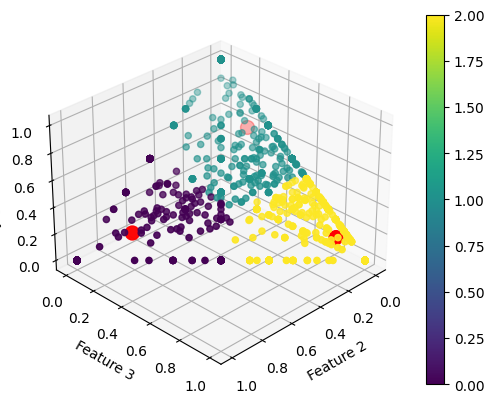

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
cmap = plt.cm.get_cmap('viridis')
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c = label, cmap = cmap)
# Add a color bar
cb = plt.colorbar(sc)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2],
           c='r', marker='o', s=100)
# Set the viewpoint
ax.view_init(elev=30, azim=45)
# Set the axis labels
ax.set_xlabel('Feature 2')
ax.set_ylabel('Feature 3')
ax.set_zlabel('Feature 4')
# Show the plot
plt.show()

In [ ]:
count

[572, 402, 672]

- - - - - -
| Negative | Neutral | Positive | <br>
- -------- 


In [ ]:
clustering.cluster_centers_

array([[0.07831954, 0.26539985, 0.6562806 ],
       [0.74200308, 0.12420361, 0.13379331],
       [0.04413038, 0.84471994, 0.11114969]])

## Pytorch Implementation Experimental

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import torch.optim as optim
torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
from torch.utils.data import TensorDataset as Dataset
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torchvision.io import read_image
import os
from sklearn.model_selection import train_test_split

KeyboardInterrupt: ignored

In [ ]:
class MyCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv2_1 = nn.Conv2d(3,6,3)
    self.conv2_2 = nn.Conv2d(6,32,3)
    self.lin_1 = nn.Linear(372290,200)
    self.lin_2 = nn.Linear(200,6)
  def forward(self,x):
    x=F.relu(self.conv2_1(x))
    x = F.max_pool2d(x,2)
    x=F.relu(self.conv2_2(x))
    x= F.max_pool2d(x,2)
    x = torch.flatten(x,1)
    x = F.relu(self.lin_1(x))
    x=F.relu(self.lin_2(x))

class MyDataset(Dataset):
  def __init__(self,images,labels,dir):
    super().__init__()
    self.images = images
    self.labels = labels
    self.dir = dir
  def __len__(self):
    return len(self.images)
  def __getitem__(self,ind):
    try:
      if os.path.exists(os.path.join(dir, images[ind])+".jpg"):
        images_dir = os.path.join(dir, images[ind])+".jpg"
        image = read_image(images_dir)


      else:
        images_dir = os.path.join(dir, images[ind])+".png"
        image = read_image(images_dir)

    except:
      return "",""
    label = labels[ind]
    return image, label

model = MyCNN()

labels = clustering.labels_

images = list(csv.iloc[:,1])
print(len(images))

dir = "/content/drive/MyDrive/GroupProject/Images/"


optimizer = optim.SGD(model.parameters(), lr=0.01)
criterion = nn.MSELoss()


data = MyDataset(images,labels,dir)
images_T = []
labels_T = []
print( next(iter(data)))
for i in range(len(images)):
  im,l =  next(iter(data))
  if im == "":
    continue
  images_T.append(im)
  labels_T.append(l)



train_x, val_x, train_y, val_y = train_test_split(images_T, labels_T, test_size = 0.1)


1485
(tensor([[[148, 148, 149,  ..., 137, 136, 135],
         [152, 151, 151,  ..., 137, 136, 135],
         [155, 154, 153,  ..., 137, 137, 136],
         ...,
         [181, 179, 178,  ..., 105,  99, 103],
         [181, 180, 179,  ..., 109, 102,  92],
         [181, 181, 181,  ..., 114, 104,  89]],

        [[140, 140, 141,  ..., 129, 128, 127],
         [144, 143, 143,  ..., 129, 128, 127],
         [147, 146, 145,  ..., 129, 129, 128],
         ...,
         [131, 129, 128,  ..., 125, 122, 126],
         [131, 130, 129,  ..., 129, 125, 115],
         [131, 131, 131,  ..., 134, 127, 112]],

        [[127, 127, 128,  ..., 118, 117, 116],
         [131, 130, 130,  ..., 118, 117, 116],
         [134, 133, 132,  ..., 118, 118, 117],
         ...,
         [108, 106, 105,  ..., 158, 154, 158],
         [108, 107, 106,  ..., 162, 157, 147],
         [108, 108, 108,  ..., 167, 159, 144]]], dtype=torch.uint8), 0)


In [ ]:
for epoch in range(10):

  for i in range(1485):
    input,label = next(iter(data))
    if type(input) == str:
      continue
    print(input.type)
    optimizer.zero_grad()   # zero the gradient buffers
    input = input.type(torch.FloatTensor)
    output = Net(input)
    loss = criterion(output,str(label))
    loss.backward()
    optimizer.step()    # Does the update

NameError: ignored

In [ ]:
print(model.parameters)

<bound method Module.parameters of MyCNN(
  (conv2_1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2_2): Conv2d(6, 32, kernel_size=(3, 3), stride=(1, 1))
  (lin_1): Linear(in_features=288, out_features=200, bias=True)
  (lin_2): Linear(in_features=200, out_features=6, bias=True)
)>


In [ ]:
train_x[0].shape

AttributeError: ignored

## Working Keras Implementation

In [ ]:
import os
from sklearn.model_selection import train_test_split

In [ ]:
images_name = []
labels = list(clustering.labels_)
print(set(labels))
images = list(csv.iloc[:,1])
print(images)
dir = "/content/drive/MyDrive/GroupProject/Images/"
x=[]
for ind in range(len(images)):

  if os.path.exists(os.path.join(dir, images[ind])+".jpg"):
        images_dir = os.path.join(dir, images[ind])+".jpg"
        images_name.append(images_dir)
  elif os.path.exists(os.path.join(dir, images[ind])+".png"):
        images_dir = os.path.join(dir, images[ind])+".png"
        images_name.append(images_dir)
  else:
    x.append(ind)

for i in range(len(x)):
  images.pop(x[i])
  labels.pop(x[i])

{0, 1, 2}
['q5hxiq9tljoa1', '6g0wuj582vka1', 'i3uzxp5qe7ia1', 'n8knay8tweoa1', '6ehwjtoho3la1', '3rExkHp', 'vn9qd2v', 'xoostvr1ieoa1', 'hwcaydokvvaa1', '07ab0z57x4ca1', 'uxmexz121afa1', '7qsulpwnhmga1', 'jkwrrylj9s7a1', 'kzgxatgzazfa1', '1deaj7oddaia1', '1japi49hlila1', '7t36s3hof7ka1', 'fck8pcu7upna1', 'cgy6mrbemcoa1', 'mj560j2pf0la1', 'bm4cglvnfhga1', 'qyxvpghzwkha1', 'kk6tt1wy7gna1', 'bz45hee2i6oa1', '8ixza6uhoioa1', '7zfpz587qfoa1', 'gv45zafefgoa1', 'd28gbbr5wdoa1', 'rnskca76heoa1', 'z8ah1i8xz5oa1', '6beWknU', 'f832s5luicoa1', 'd81zhg0138na1', '4yxvefs7mcoa1', '3oq6h6o0qeoa1', 'kl1qbhfec9ga1', 'jtfp1c81ccoa1', 'fv079sn28uka1', 'n83emlx48gna1', 'aechw18eczka1', 'fixsco7ha9na1', '63oqbrmeuafa1', 'xud6wixxbtka1', '0jfwavchlhna1', '9eze05harska1', '118curiwzkma1', 'h1Ptriv', 'bdu7fakeysma1', '1tc7wtlzov7a1', 'jl3m2m1ur6ia1', 'afpd9lx447aa1', 'pmlr6ypk0zia1', '298ah1tjf7ma1', '33y08ael5hla1', 'im2ep0iyizma1', 'osinkd5wybha1', '57emovf0iwka1', 'hgfcbr3ik2ha1', 'v74tiyz64wha1', 'jclnw6xm1

IndexError: ignored

In [ ]:
images = list(csv.iloc[:,1])
labels = list(clustering.labels_)
ss = [x + '.png' for x in images]
# Combine 'images' and 'labels' into a DataFrame
df = pd.DataFrame({'Image': ss, 'Label': labels})

print(df.head(10))

               Image  Label
0  q5hxiq9tljoa1.png      2
1  6g0wuj582vka1.png      2
2  i3uzxp5qe7ia1.png      2
3  n8knay8tweoa1.png      2
4  6ehwjtoho3la1.png      2
5        3rExkHp.png      1
6        vn9qd2v.png      1
7  xoostvr1ieoa1.png      2
8  hwcaydokvvaa1.png      2
9  07ab0z57x4ca1.png      2


In [ ]:
import tensorflow as tf
import numpy as np

image_names = images_name

train_images, test_images, train_labels, test_labels = train_test_split(image_names, labels, test_size=0.2, random_state=74)



# Define some hyperparameters
batch_size = 2
epochs = 10
num_classes = 3

# Define a function to load an image given its filename
def load_image(filename):
    img = tf.io.read_file(filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (224, 224))
    return img

# Define a dataset from the training images and labels
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_dataset = train_dataset.shuffle(len(train_images)).map(lambda x, y: (load_image(x), y))
train_dataset = train_dataset.batch(batch_size).repeat(epochs)

# Define a dataset from the testing images and labels
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels))
test_dataset = test_dataset.map(lambda x, y: (load_image(x), y))
test_dataset = test_dataset.batch(batch_size)




## Personalized CNN

In [ ]:
# Define a CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset, steps_per_epoch=300,epochs = 10)

Epoch 1/10
 31/300 [==>...........................] - ETA: 7:05 - loss: 4.2089 - accuracy: 0.3871

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
# loss, accuracy = model.evaluate(test_dataset, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Plot the training history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.title('Training history')
plt.xlabel('Epoch')
plt.legend()
plt.show()

NameError: ignored

## Pre Trained Model


In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

base_model.trainable = False
inputs = tf.keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(200, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 200)               5017800   
                                                                 
 dense_4 (Dense)             (None, 3)                 603       
                                                                 
Total params: 19,733,091
Trainable params: 5,018,403
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model.fit(train_dataset, steps_per_epoch=150,epochs = 10)

Epoch 1/10
150/150 [==============================] - 25s 156ms/step - loss: 2.7567 - accuracy: 0.3733
Epoch 2/10
150/150 [==============================] - 22s 149ms/step - loss: 1.7881 - accuracy: 0.3533
Epoch 3/10
150/150 [==============================] - 25s 163ms/step - loss: 1.4468 - accuracy: 0.3500
Epoch 4/10
150/150 [==============================] - 23s 153ms/step - loss: 1.1302 - accuracy: 0.4167
Epoch 5/10
150/150 [==============================] - 24s 158ms/step - loss: 1.0289 - accuracy: 0.4482
Epoch 6/10
150/150 [==============================] - 21s 141ms/step - loss: 0.9184 - accuracy: 0.5767
Epoch 7/10
150/150 [==============================] - 23s 151ms/step - loss: 1.0271 - accuracy: 0.5133
Epoch 8/10
150/150 [==============================] - 23s 152ms/step - loss: 0.9683 - accuracy: 0.5500
Epoch 9/10
150/150 [==============================] - 26s 171ms/step - loss: 0.8307 - accuracy: 0.6221
Epoch 10/10
150/150 [==============================] - 21s 143ms/step - l

Test loss: 1.7340
Test accuracy: 0.3631


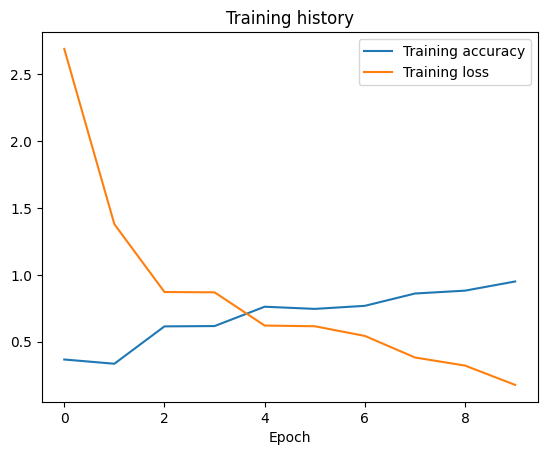

In [ ]:
import matplotlib.pyplot as plt
loss, accuracy = model.evaluate(test_dataset, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Plot the training history
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.title('Training history')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/GroupProject/latest_weights.h5")